**Loading libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**Loading data**

In [8]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date']
)
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


**Analysis of  Customers_Age**

In [9]:
sales['Customer_Age'].mean()

35.91921157861212

In [10]:
sales['Customer_Age'].median()

35.0

<AxesSubplot: ylabel='Density'>

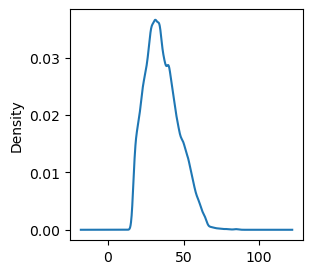

In [11]:
sales['Customer_Age'].plot(kind='kde',figsize=(3,3))

<AxesSubplot: >

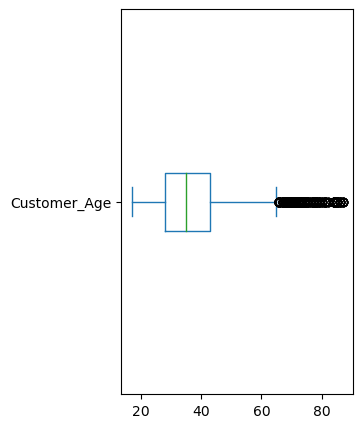

In [12]:
sales['Customer_Age'].plot(kind='box',vert=False,figsize=(3,5))

**Analysis of Order Quantity**

In [13]:
sales['Order_Quantity'].mean()

11.901659648253654

<AxesSubplot: ylabel='Frequency'>

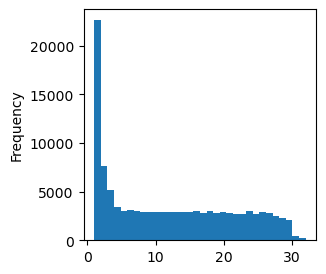

In [20]:
sales['Order_Quantity'].plot(kind='hist',bins=32,figsize=(3,3))

<AxesSubplot: >

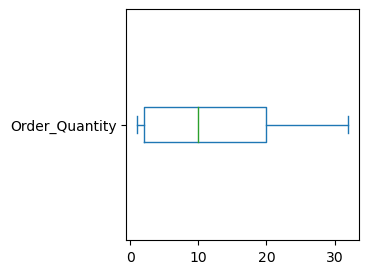

In [22]:
sales['Order_Quantity'].plot(kind='box',vert=False,figsize=(3,3))

**Analysis of Sales per Year**

In [24]:
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot: ylabel='Year'>

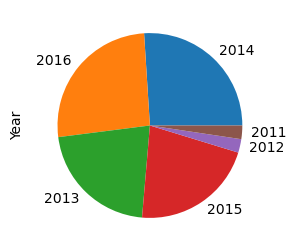

In [26]:
sales['Year'].value_counts().plot(kind='pie',figsize=(3,3))

**Sales per Month**

In [27]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<AxesSubplot: >

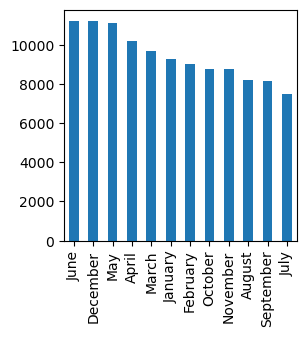

In [30]:
sales['Month'].value_counts().plot(kind='bar',figsize=(3,3))

**Sales per Country**

In [31]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

<AxesSubplot: >

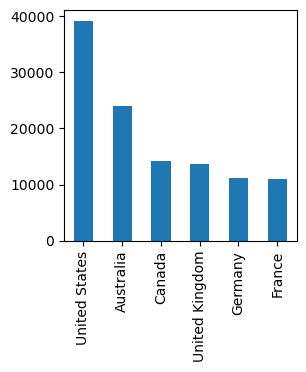

In [33]:
sales['Country'].value_counts().plot(kind='bar',figsize=(3,3))

**Every product sold**

In [36]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

<AxesSubplot: >

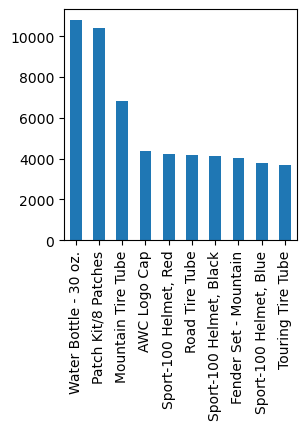

In [38]:
sales['Product'].value_counts().head(10).plot(kind='bar',figsize=(3,3))

**Is there a relationship between Unit Cost and Unit Price?**

c:\Users\alsol\AppData\Local\Programs\Orange\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Unit_Cost', ylabel='Unit_Price'>

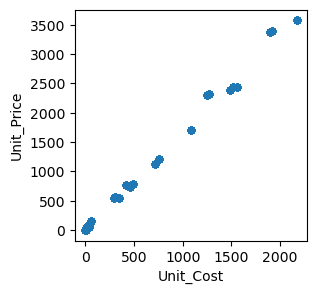

In [42]:
sales.plot(kind='scatter',x='Unit_Cost',y='Unit_Price',figsize=(3,3))

**Is there a relationship between Order Quantity and Profit?**

<AxesSubplot: xlabel='Order_Quantity', ylabel='Profit'>

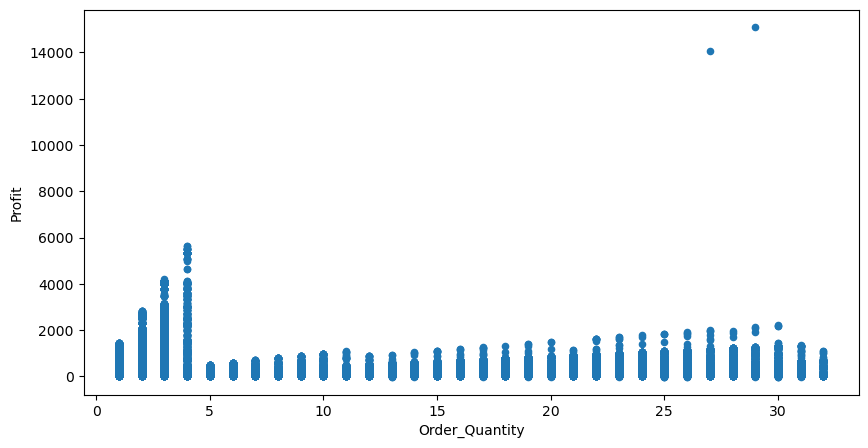

In [46]:
sales.plot(kind='scatter',x='Order_Quantity',y='Profit',figsize=(10,5))

**Relatinship between Profir and Country**

<AxesSubplot: title={'center': 'Profit'}, xlabel='[Country]'>

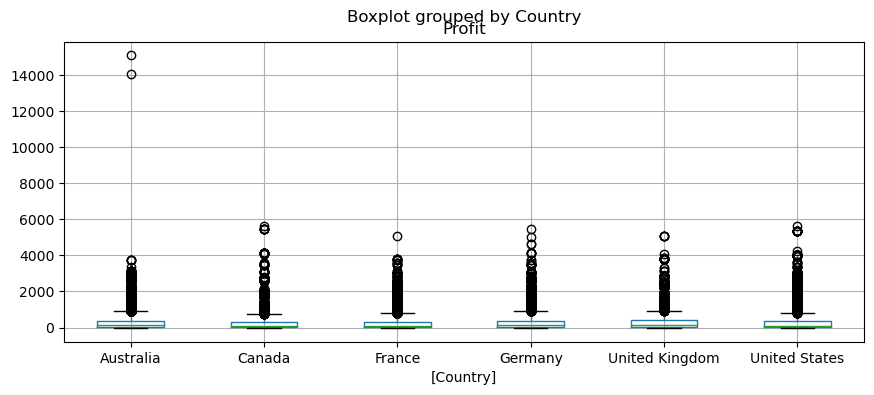

In [53]:
columns = ['Profit','Country']
sales[columns].boxplot(by='Country', figsize=(10,4))

**Relationship between Customer Age and Country**

<AxesSubplot: title={'center': 'Customer_Age'}, xlabel='[Country]'>

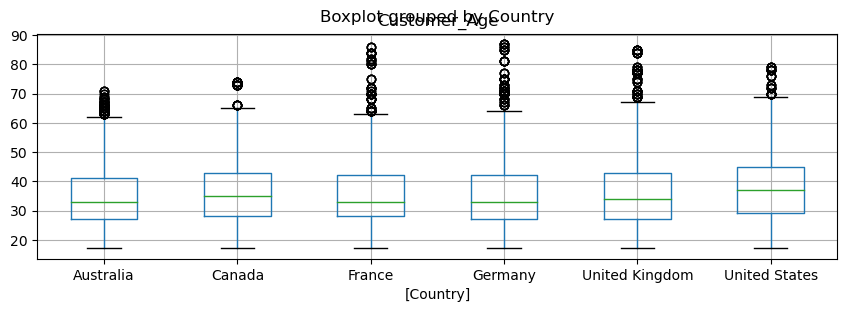

In [57]:
columns = ['Customer_Age','Country']
sales[columns].boxplot(by='Country',figsize=(10,3))

**Add a Calculated Column for Date**

In [66]:
sales['Calculated_Date'] = sales[['Year','Month','Day']].apply(lambda x: '{}-{}-{}'.format(x[0],x[1],x[2]),axis=1)
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [69]:
sales['Calculated_Date']=pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

**Sales per Year**

<AxesSubplot: >

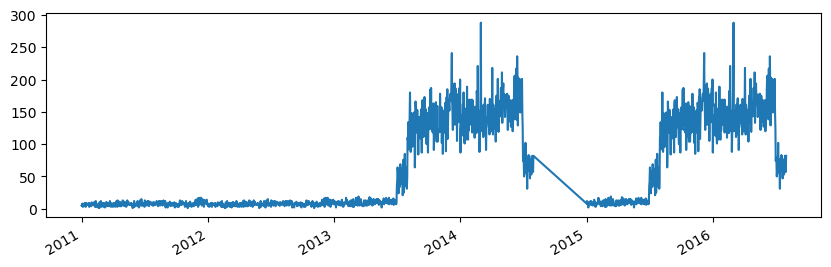

In [70]:
sales['Calculated_Date'].value_counts().plot(kind='line',figsize=(10,3))

In [71]:
sales['Revenue'] += 50

In [77]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

In [81]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104